In [57]:
# Import packages
from collections import Counter
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

import time
import warnings

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector


from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

import seaborn as sns 
from sklearn.svm import SVC


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn import linear_model
import ast

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams.update({"font.size": 12})


In [58]:
#Load Dataset
#Independent Variables Dataset
df_comments = pd.read_csv("data/features_sp500.csv", delimiter=";",  encoding="utf-8")
#Dependent Variables Dataset
SP500 = pd.read_csv("data/SandP_500_withHighLow.csv", sep=",")

In [59]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Columns: 1856 entries, created_utc to BAGHOLDER
dtypes: float64(1851), int64(4), object(1)
memory usage: 6.3+ MB


In [60]:
df_comments.head()

,created_utc,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
0,2020-01-01,7.303436,21.868398,6.478874,33.971240,104,104,0.0,130.939615,820.633747,...,23.0,7.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,4.819957,36.665525,0.440766,52.279186,139,2192,0.0,532.971197,4045.896734,...,32.0,31.0,15.0,6.0,31.0,9.0,2.0,3.0,NaN,NaN
2,2020-01-03,4.492971,28.560375,5.997937,41.947068,115,36580,0.0,572.975674,5150.854530,...,44.0,27.0,20.0,7.0,32.0,9.0,2.0,2.0,2.0,NaN
3,2020-01-04,1.844444,4.022222,0.093232,7.623026,28,16584,0.0,275.415978,1741.325526,...,25.0,10.0,14.0,NaN,7.0,NaN,2.0,NaN,1.0,NaN
4,2020-01-05,1.537381,15.433770,4.989659,22.903422,67,460,0.0,253.327217,1925.347894,...,21.0,11.0,9.0,2.0,13.0,1.0,NaN,NaN,NaN,NaN


In [61]:
df_comments.set_index('created_utc',inplace=True)

In [62]:
df_comments.tail()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
created_utc,,,,,,,,,,,,,,,,,,,,,
2021-03-27,8.446676,33.257374,6.096034,24.403107,165,183,164.13,80.916034,363.794892,1156.0,...,21.0,10.0,5.0,1.0,8.0,NaN,12.0,NaN,NaN,NaN
2021-03-28,32.854605,109.840038,16.024446,59.274937,444,764,431.25,1155.309506,5202.869285,15497.0,...,144.0,59.0,30.0,6.0,41.0,2.0,38.0,1.0,2.0,NaN
2021-03-29,56.175202,301.651219,38.316436,178.934077,1187,1253,1183.16,3854.146727,24189.232163,77539.0,...,447.0,193.0,89.0,42.0,139.0,19.0,178.0,10.0,7.0,NaN
2021-03-30,63.219496,262.440205,37.621248,171.155115,1180,1200,1178.24,4048.448978,23129.645792,74152.0,...,376.0,152.0,85.0,34.0,120.0,43.0,127.0,4.0,9.0,NaN
2021-03-31,56.813573,281.942590,44.933902,199.390178,1209,1231,1206.68,3638.755989,21973.660961,70326.0,...,421.0,153.0,93.0,49.0,109.0,28.0,144.0,4.0,3.0,NaN


In [63]:
df_comments = df_comments[~df_comments.index.duplicated(keep='first')]


In [64]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 2020-01-01 to 2021-03-31
Columns: 1855 entries, title_polarity to BAGHOLDER
dtypes: float64(1851), int64(4)
memory usage: 6.3+ MB


In [65]:
df_comments.describe()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
count,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,438.000000,438.000000,4.380000e+02,...,442.000000,442.000000,442.000000,433.000000,442.000000,429.000000,431.000000,340.000000,350.000000,28.00000
mean,14.537286,156.427513,15.484208,151.189946,678.720090,4.617169e+04,565.842099,2114.959322,18581.256645,6.059937e+04,...,279.726244,156.402715,74.671946,65.697460,125.918552,28.128205,94.187935,13.250000,7.311429,1.50000
std,35.929044,537.983705,34.861226,467.054727,2447.165716,3.140796e+05,2426.463128,2438.056854,21605.877897,7.707322e+04,...,255.402141,424.423462,130.992214,388.620004,322.354522,114.572998,337.723176,63.938156,25.142633,0.96225
min,-21.581163,3.839683,-2.282257,1.461834,12.000000,3.100000e+01,0.000000,2.618842,33.762071,1.120000e+02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.689167,45.433838,6.460240,58.661751,206.500000,3.040000e+02,0.000000,1111.788159,9146.453981,2.892075e+04,...,143.250000,52.000000,32.250000,5.000000,34.250000,5.000000,4.000000,2.000000,1.000000,1.00000
50%,6.369248,73.400514,10.009150,91.043298,327.000000,5.750000e+02,231.000000,1635.806388,15433.488013,5.037950e+04,...,219.000000,85.000000,49.000000,11.000000,67.000000,11.000000,9.000000,3.000000,3.000000,1.00000
75%,13.812426,127.810205,13.936974,134.459017,544.000000,2.081500e+03,423.985000,2145.751236,20478.480102,6.563450e+04,...,325.750000,124.750000,68.750000,20.000000,105.750000,18.000000,34.000000,5.000000,5.000000,1.25000
max,535.607415,9509.963580,560.186794,8483.404539,42898.000000,4.315205e+06,42746.920000,24582.360475,252889.928549,1.090474e+06,...,1934.000000,6235.000000,1471.000000,5448.000000,3609.000000,1554.000000,3684.000000,875.000000,326.000000,4.00000


In [66]:
SP500.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Closing Delta,Closing Movement
0,2017-02-28,218.779483,219.038316,218.178624,218.594604,96961900,0.0,0,0.00,0
1,2017-03-01,220.369463,222.153576,220.350971,221.654388,149158200,0.0,0,3.06,1
2,2017-03-02,221.451009,221.460262,220.203067,220.258530,70246000,0.0,0,-1.40,-1
3,2017-03-03,220.166084,220.572826,219.759343,220.397186,81974300,0.0,0,0.14,1
4,2017-03-06,219.546728,220.119856,219.093764,219.740860,55391500,0.0,0,-0.66,-1


In [67]:
SP500 = SP500[["Date","Close","Closing Movement"]]

In [68]:
df_features = df_comments

In [69]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 2020-01-01 to 2021-03-31
Columns: 1855 entries, title_polarity to BAGHOLDER
dtypes: float64(1851), int64(4)
memory usage: 6.3+ MB


In [70]:
#replace Nan with 0
df_features = df_features.fillna(0)

In [71]:
df_features.head()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
created_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7.303436,21.868398,6.478874,33.971240,104,104,0.0,130.939615,820.633747,2543.0,...,23.0,7.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,4.819957,36.665525,0.440766,52.279186,139,2192,0.0,532.971197,4045.896734,12594.0,...,32.0,31.0,15.0,6.0,31.0,9.0,2.0,3.0,0.0,0.0
2020-01-03,4.492971,28.560375,5.997937,41.947068,115,36580,0.0,572.975674,5150.854530,16276.0,...,44.0,27.0,20.0,7.0,32.0,9.0,2.0,2.0,2.0,0.0
2020-01-04,1.844444,4.022222,0.093232,7.623026,28,16584,0.0,275.415978,1741.325526,5419.0,...,25.0,10.0,14.0,0.0,7.0,0.0,2.0,0.0,1.0,0.0
2020-01-05,1.537381,15.433770,4.989659,22.903422,67,460,0.0,253.327217,1925.347894,6162.0,...,21.0,11.0,9.0,2.0,13.0,1.0,0.0,0.0,0.0,0.0


In [72]:
df_features.shape

(443, 1855)

In [73]:
df_features.describe()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
count,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,443.000000,443.000000,4.430000e+02,...,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,14.537286,156.427513,15.484208,151.189946,678.720090,4.617169e+04,565.842099,2091.088449,18371.535915,5.991540e+04,...,279.094808,156.049661,74.503386,64.214447,125.634312,27.239278,91.636569,10.169300,5.776524,0.094808
std,35.929044,537.983705,34.861226,467.054727,2447.165716,3.140796e+05,2426.463128,2434.524403,21573.012485,7.690355e+04,...,255.459005,424.008193,130.892038,384.322895,322.045234,112.851468,333.458697,56.274624,22.539502,0.435989
min,-21.581163,3.839683,-2.282257,1.461834,12.000000,3.100000e+01,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.689167,45.433838,6.460240,58.661751,206.500000,3.040000e+02,0.000000,1087.708502,8978.360351,2.782750e+04,...,143.000000,51.500000,32.000000,4.500000,34.000000,4.000000,4.000000,1.000000,1.000000,0.000000
50%,6.369248,73.400514,10.009150,91.043298,327.000000,5.750000e+02,231.000000,1632.767239,15370.494150,5.019500e+04,...,219.000000,85.000000,49.000000,11.000000,67.000000,10.000000,8.000000,2.000000,2.000000,0.000000
75%,13.812426,127.810205,13.936974,134.459017,544.000000,2.081500e+03,423.985000,2140.903162,20418.679947,6.552200e+04,...,325.500000,124.500000,68.500000,19.000000,105.500000,17.500000,34.000000,4.000000,4.000000,0.000000
max,535.607415,9509.963580,560.186794,8483.404539,42898.000000,4.315205e+06,42746.920000,24582.360475,252889.928549,1.090474e+06,...,1934.000000,6235.000000,1471.000000,5448.000000,3609.000000,1554.000000,3684.000000,875.000000,326.000000,4.000000


In [74]:
# Join Labels with features
SP500.set_index("Date", inplace=True)
SP500["created_utc"] = SP500.index
SP500.set_index("created_utc", inplace=True)
dataset_with_labels = df_features.join(SP500, how='inner')

In [75]:
dataset_with_labels.head()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER,Close,Closing Movement
created_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.819957,36.665525,0.440766,52.279186,139,2192,0.0,532.971197,4045.896734,12594.0,...,15.0,6.0,31.0,9.0,2.0,3.0,0.0,0.0,317.873199,1
2020-01-03,4.492971,28.560375,5.997937,41.947068,115,36580,0.0,572.975674,5150.854530,16276.0,...,20.0,7.0,32.0,9.0,2.0,2.0,2.0,0.0,315.466217,-1
2020-01-06,2.237558,26.646118,1.099999,47.910753,141,142,0.0,498.933519,4028.524789,12821.0,...,24.0,2.0,20.0,4.0,1.0,1.0,0.0,0.0,316.669739,1
2020-01-07,0.928602,33.124699,2.678287,58.454821,143,143,0.0,439.226358,4134.806548,13415.0,...,19.0,3.0,31.0,3.0,2.0,0.0,1.0,0.0,315.779327,-1
2020-01-08,-4.471613,46.010141,5.871738,95.186840,226,226,0.0,560.857685,7624.799750,24207.0,...,21.0,5.0,43.0,12.0,4.0,1.0,1.0,0.0,317.462311,1


In [76]:
dataset_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 2020-01-02 to 2021-03-31
Columns: 1857 entries, title_polarity to Closing Movement
dtypes: float64(1852), int64(5)
memory usage: 4.3+ MB


In [77]:
dataset_with_labels = dataset_with_labels[~dataset_with_labels.index.duplicated(keep='first')]

In [78]:
dataset_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 2020-01-02 to 2021-03-31
Columns: 1857 entries, title_polarity to Closing Movement
dtypes: float64(1852), int64(5)
memory usage: 4.3+ MB


In [79]:
dataset_with_labels.loc[(dataset_with_labels['Closing Movement'] == -1),'Closing Movement']=0

In [80]:
labels_clsfier = dataset_with_labels.pop('Closing Movement')
labels_reg_actual = dataset_with_labels['Close']

In [81]:
#Feature Normalization -> dataset 1
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(dataset_with_labels)

# transform training data
norm_features = norm.transform(dataset_with_labels)


In [82]:
# Creating backup the dataframe of the scaled data
dataset = pd.DataFrame(norm_features, index=dataset_with_labels.index, columns=dataset_with_labels.columns)
dataset.head()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER,Close
created_utc,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.047383,0.003048,0.000877,0.005641,0.002519,0.000501,0.0,0.021681,0.015999,0.011549,...,0.004972,0.010197,0.001101,0.008590,0.005792,0.000543,0.003429,0.000000,0.0,0.556488
2020-01-03,0.046796,0.002195,0.010796,0.004422,0.001960,0.008470,0.0,0.023308,0.020368,0.014926,...,0.004330,0.013596,0.001285,0.008867,0.005792,0.000543,0.002286,0.006135,0.0,0.542882
2020-01-06,0.042748,0.001994,0.002054,0.005126,0.002566,0.000026,0.0,0.020296,0.015930,0.011757,...,0.004491,0.016315,0.000367,0.005542,0.002574,0.000271,0.001143,0.000000,0.0,0.549685
2020-01-07,0.040399,0.002676,0.004871,0.006369,0.002613,0.000026,0.0,0.017868,0.016350,0.012302,...,0.004491,0.012916,0.000551,0.008590,0.001931,0.000543,0.000000,0.003067,0.0,0.544652
2020-01-08,0.030707,0.004032,0.010571,0.010701,0.004549,0.000045,0.0,0.022815,0.030151,0.022199,...,0.008019,0.014276,0.000918,0.011915,0.007722,0.001086,0.001143,0.003067,0.0,0.554165


In [83]:
labels_reg_norm = dataset.pop('Close')

In [84]:
dataset.describe()

,title_polarity,title_subjectivity,submission_body_polarity,submission_body_subjectivity,submission_count,submission_score,upvote_ratio,comment_body_polarity,comment_body_subjectivity,comment_count,...,DD.2,buying,high,BUY,holding,GO,squeeze,BUYING,TENDIES,BAGHOLDER
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.069333,0.019814,0.033369,0.021586,0.019124,0.013537,0.016824,0.098363,0.086980,0.066339,...,0.165006,0.029308,0.056687,0.015491,0.041772,0.023101,0.027726,0.015453,0.023313,0.033607
std,0.074149,0.067637,0.073634,0.065816,0.068275,0.084524,0.067938,0.100362,0.092077,0.078402,...,0.137605,0.074528,0.089279,0.083794,0.093918,0.085788,0.094503,0.076371,0.082049,0.129435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043916,0.005036,0.015139,0.009059,0.005505,0.000075,0.000000,0.061210,0.055063,0.042096,...,0.099276,0.012189,0.027192,0.001652,0.016071,0.006435,0.001357,0.001143,0.003067,0.000000
50%,0.051705,0.008215,0.020898,0.012212,0.008165,0.000155,0.006732,0.078465,0.069985,0.053114,...,0.128749,0.016520,0.038749,0.002753,0.022998,0.009009,0.002986,0.003429,0.009202,0.000000
75%,0.067221,0.014292,0.027361,0.016489,0.013554,0.000566,0.012166,0.094418,0.090600,0.067799,...,0.181489,0.021652,0.048946,0.004222,0.031865,0.012870,0.010858,0.005714,0.015337,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#Drop DD.2 column
dataset = dataset.drop(columns=['DD.2'])

In [86]:
dataset_with_labels = dataset_with_labels.drop(columns=['DD.2'])

In [87]:
# Partitioning the dataset into test and train (test = (25% of total data) and train = (75% of total data) )
X_train, X_test, y_train, y_test = train_test_split(dataset, labels_clsfier, test_size=0.25, random_state = 4,stratify=labels_clsfier)


In [88]:
y_train

created_utc
2020-07-28    0
2020-01-22    1
2020-11-16    1
2020-12-16    1
2020-02-05    1
             ..
2020-02-20    0
2020-09-04    0
2020-06-01    1
2020-11-25    0
2021-03-05    1
Name: Closing Movement, Length: 228, dtype: int64

In [89]:
y_test

created_utc
2020-05-28    0
2020-03-19    1
2020-09-02    1
2021-01-26    0
2020-03-06    0
             ..
2020-03-25    1
2020-08-31    0
2020-09-18    0
2020-11-11    1
2021-03-31    1
Name: Closing Movement, Length: 77, dtype: int64

Decision Tree
---------------


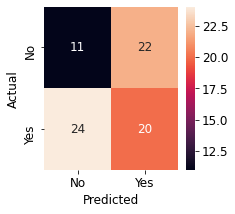

0.6190293856470326
0.46830065359477124
0.5643010752688171
0.5290095525389642

---------------
Means Cross Validation Accuracy Score :0.7462321111488274
Precision : From the Prediction of High, 62.0% values are predicted correctly
Recall : From overall High, 47.0% values are predicted correctly
AUC : 54.0%
---------------
------
True Nagatives: 11
Specificity: 0.3333333333333333
              precision    recall  f1-score   support

         Low       0.31      0.33      0.32        33
        High       0.48      0.45      0.47        44

    accuracy                           0.40        77
   macro avg       0.40      0.39      0.39        77
weighted avg       0.41      0.40      0.40        77

roc_auc: 0.3939393939393939
Random Forest
---------------


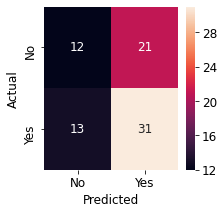

0.5694586296783183
0.7839869281045752
0.5344086021505376
0.49446958270487684

---------------
Means Cross Validation Accuracy Score :0.7249983054069064
Precision : From the Prediction of High, 52.0% values are predicted correctly
Recall : From overall High, 71.0% values are predicted correctly
AUC : 50.0%
---------------
------
True Nagatives: 12
Specificity: 0.36363636363636365
              precision    recall  f1-score   support

         Low       0.48      0.36      0.41        33
        High       0.60      0.70      0.65        44

    accuracy                           0.56        77
   macro avg       0.54      0.53      0.53        77
weighted avg       0.55      0.56      0.55        77

roc_auc: 0.5340909090909092


In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
names = [
         "Decision Tree", "Random Forest"]

classifiers = [  
   # Default
    DecisionTreeClassifier(),
    RandomForestClassifier()

    ]
#print(y_test)
# iterate over classifiers
for name, clf in zip(names, classifiers):
       
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    ## Validation
    y_pred = clf.predict(X_test)
    
    #print(y_pred)
    y_train_pred=clf.predict(X_train)    
   
    
    ## Confusion Matrix 
    print(name)
    print('---------------')
    
    fig, ax = plt.subplots(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    ## K Fold Validation with 10 Folds
    scores = cross_val_score(clf, dataset,labels_clsfier, cv=10, scoring="accuracy")
    scores=np.sqrt(scores)
    print(np.mean((cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="precision"))))
    print((np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="recall"))))
    print(np.mean(cross_val_score(clf, dataset,labels_clsfier, cv=10, scoring="accuracy")))
   
    print(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="roc_auc")))
    print()
    
    print('---------------')
    print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
    print('Precision : From the Prediction of High, '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="precision")),2)*100)+'% values are predicted correctly')
    print('Recall : From overall High, '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="recall")),2)*100)+'% values are predicted correctly')
    print('AUC : '+str(round(np.mean(cross_val_score(clf, dataset, labels_clsfier, cv=10, scoring="roc_auc")),2)*100)+'%')
    print('---------------')
    
    
    print('------')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Nagatives:",tn)
    print("Specificity:",tn / (tn + fp))
    print(classification_report(y_test, y_pred, target_names=['Low','High']))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[:77].array, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("roc_auc:",roc_auc)
    
    

n_estimator_auc: 8


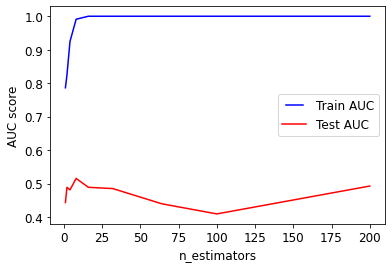

<Figure size 432x288 with 0 Axes>

In [91]:
# identify best parameters
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

print('n_estimator_auc:',n_estimators[test_results.index(max(test_results))])
best_n_estimators_auc= n_estimators[test_results.index(max(test_results))]

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
plt.savefig("rf_exp_T0/n_estimators_AUC.png")

n_estimator_specificity: 1


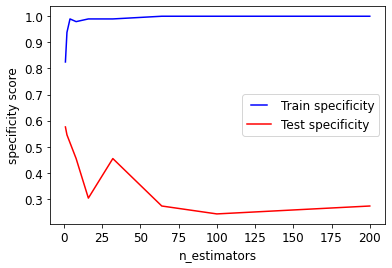

<Figure size 432x288 with 0 Axes>

In [92]:
# identify best parameters
#specificity
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('n_estimator_specificity:',n_estimators[test_results.index(max(test_results))])
best_n_estimators_specificity= n_estimators[test_results.index(max(test_results))]

line1, = plt.plot(n_estimators, train_results, 'b', label='Train specificity')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('n_estimators')
plt.show()
plt.savefig("rf_exp_T0/n_estimators_specificity.png")

In [93]:
test_results

[0.5757575757575758,
 0.5454545454545454,
 0.5151515151515151,
 0.45454545454545453,
 0.30303030303030304,
 0.45454545454545453,
 0.2727272727272727,
 0.24242424242424243,
 0.2727272727272727]

max_depth_auc: 30.0


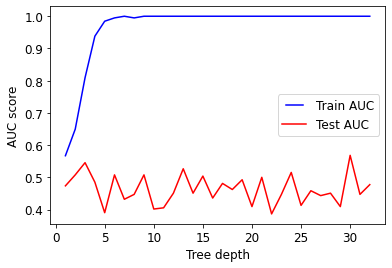

<Figure size 432x288 with 0 Axes>

In [94]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)   
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

print('max_depth_auc:',max_depths[test_results.index(max(test_results))])
best_max_depth_auc= max_depths[test_results.index(max(test_results))]

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
plt.savefig("rf_exp_T0/max_depth_AUC.png")

max_depth_specificity: 11.0


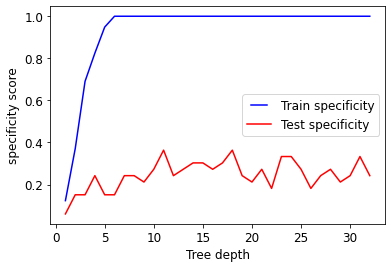

<Figure size 432x288 with 0 Axes>

In [95]:
#specificity
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)   
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('max_depth_specificity:',max_depths[test_results.index(max(test_results))])
best_max_depth_specificity= max_depths[test_results.index(max(test_results))]

line1, = plt.plot(max_depths, train_results, 'b', label='Train specificity')
line2, = plt.plot(max_depths, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('Tree depth')
plt.show()
plt.savefig("rf_exp_T0/max_depth_specificity.png")

min_samples_split_auc: 0.2


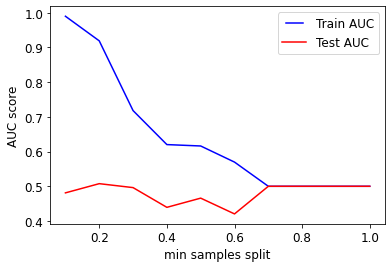

<Figure size 432x288 with 0 Axes>

In [96]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


print('min_samples_split_auc:',min_samples_splits[test_results.index(max(test_results))])
best_min_samples_split_auc= min_samples_splits[test_results.index(max(test_results))]


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()
plt.savefig("rf_exp_T0/min_samples_split_AUC.png")

min_samples_split_specificity: 0.30000000000000004


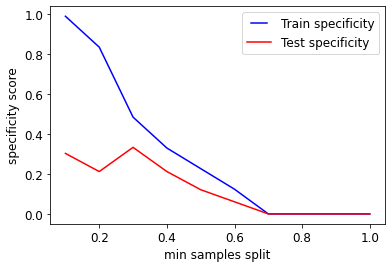

<Figure size 432x288 with 0 Axes>

In [97]:
#specificity
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   

print('min_samples_split_specificity:',min_samples_splits[test_results.index(max(test_results))])
best_min_samples_split_specificity= min_samples_splits[test_results.index(max(test_results))]

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train specificity')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('min samples split')
plt.show()
plt.savefig("rf_exp_T0/min_samples_split_specificity.png")

min_samples_leafs_auc: 0.2777777777777778


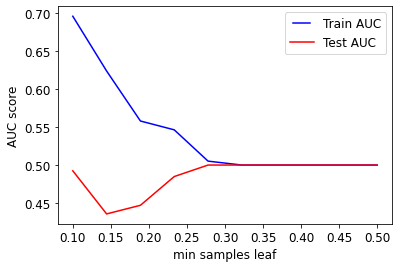

<Figure size 432x288 with 0 Axes>

In [98]:
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
print('min_samples_leafs_auc:',min_samples_leafs[test_results.index(max(test_results))])
best_min_samples_leafs_auc= min_samples_leafs[test_results.index(max(test_results))]

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()
plt.savefig("rf_exp_T0/min_samples_leaf_AUC.png")

min_samples_leaf_specificity: 0.1


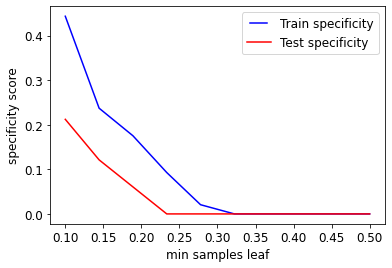

<Figure size 432x288 with 0 Axes>

In [99]:
#specificity
min_samples_leafs = np.linspace(0.1, 0.5, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('min_samples_leaf_specificity:',min_samples_leafs[test_results.index(max(test_results))])
best_min_samples_leaf_specificity= min_samples_leafs[test_results.index(max(test_results))]

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train specificity')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('min samples leaf')
plt.show()
plt.savefig("rf_exp_T0/min_samples_leaf_specificity.png")

Elapsed time to compute the importances: 8937.178 seconds
max_features_auc: 659


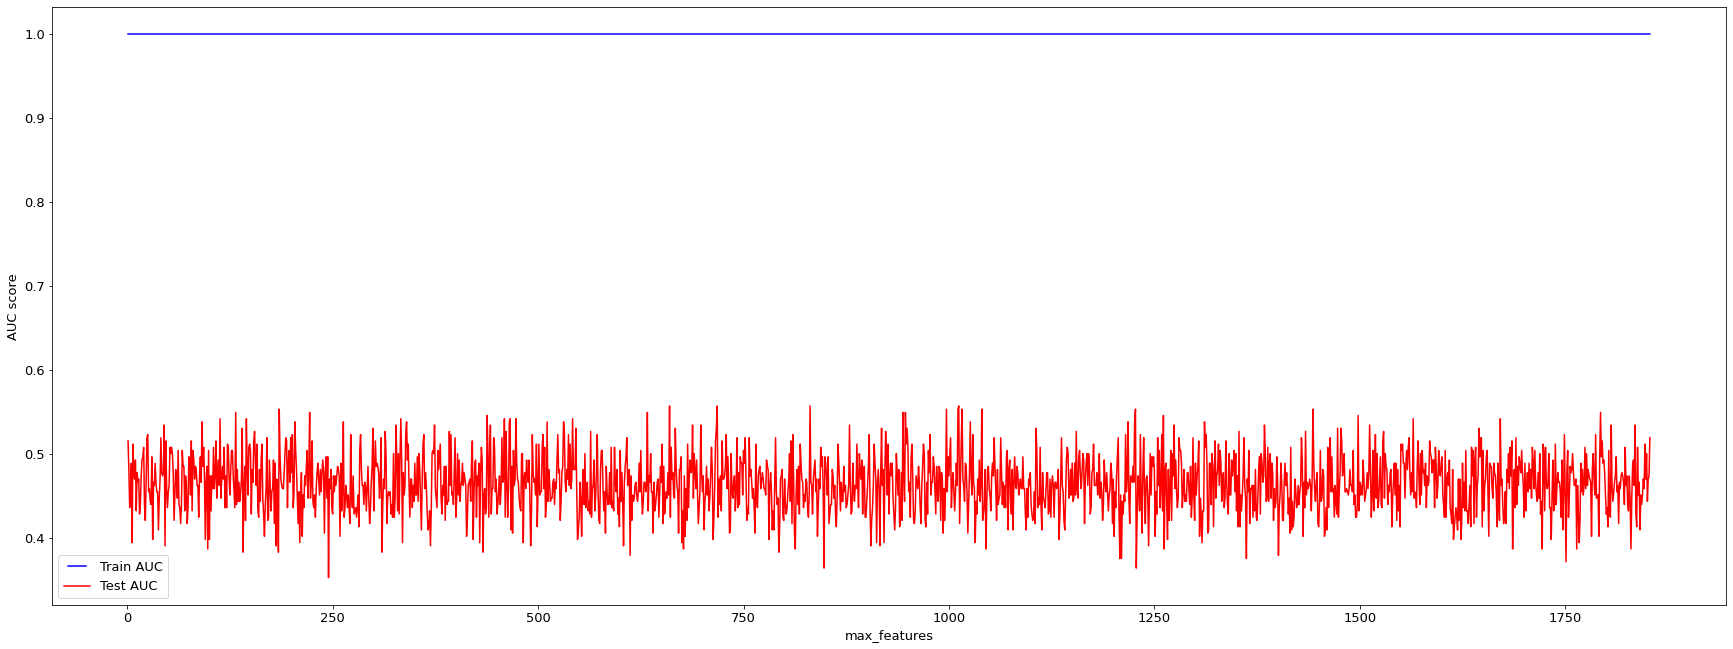

<Figure size 2160x792 with 0 Axes>

In [103]:
import time
start_time = time.time()
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   #print(max_feature)
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

print('max_features_auc:',test_results.index(max(test_results)))
best_max_features_auc= test_results.index(max(test_results))

from matplotlib.legend_handler import HandlerLine2D
plt.rcParams.update({"font.size": 13, "figure.figsize": [30,11]})
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()
plt.savefig("rf_exp_T0/max_features_AUC.png")

max_features_specificity: 230


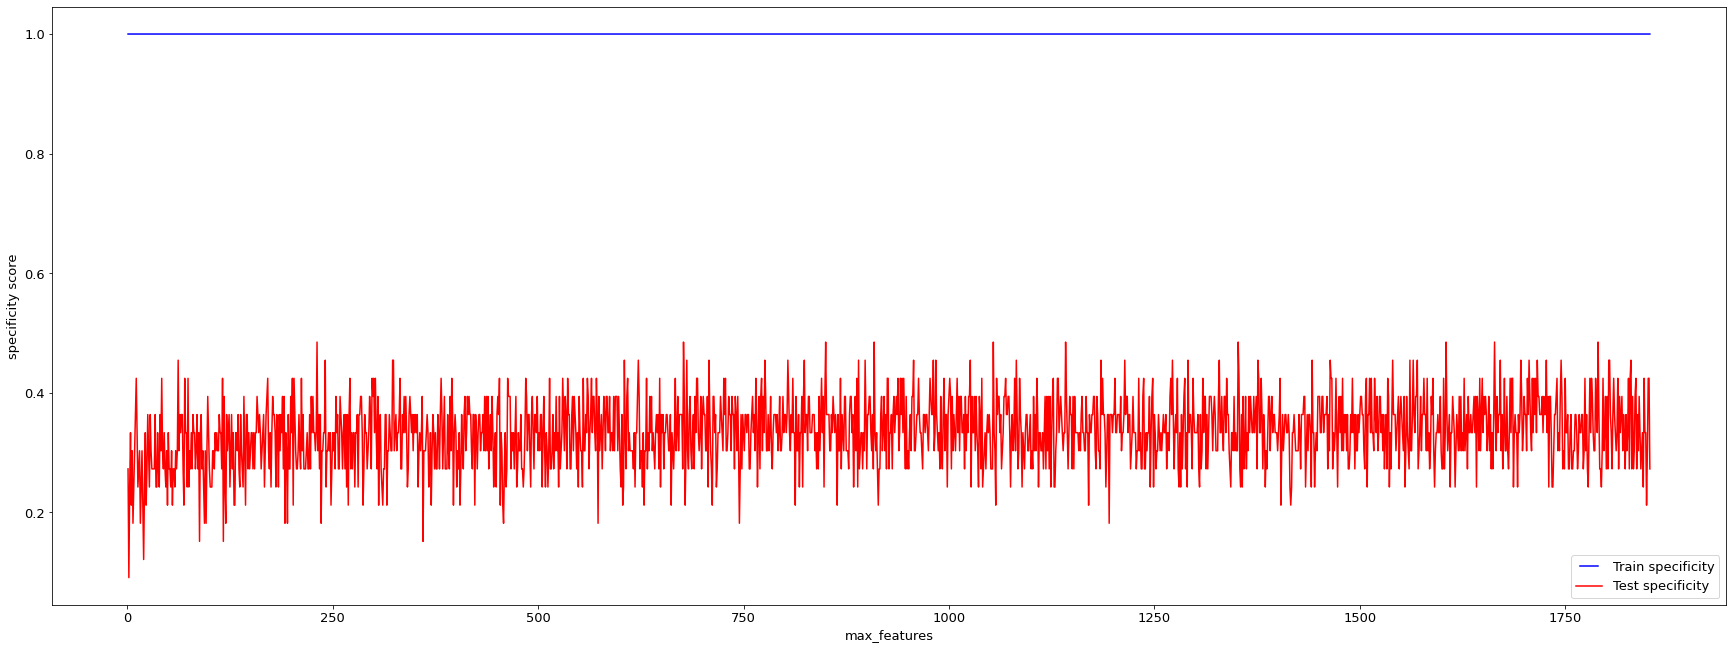

<Figure size 2160x792 with 0 Axes>

In [104]:
#specificity
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()  
   train_results.append(tn / (tn + fp))
   y_pred = rf.predict(X_test)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()   
   test_results.append(tn / (tn + fp))
   
print('max_features_specificity:',test_results.index(max(test_results)))
best_max_features_specificity= test_results.index(max(test_results))

line1, = plt.plot(max_features, train_results, 'b', label='Train specificity')
line2, = plt.plot(max_features, test_results, 'r', label='Test specificity')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('specificity score')
plt.xlabel('max_features')
plt.show()
plt.savefig("rf_exp_T0/max_features_specificity.png")

In [105]:
y_test.array

<PandasArray>
[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Length: 77, dtype: int64

In [106]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [108]:
# train Random forest classifier with best parameters - accuracy

auc_clf_rf = RandomForestClassifier(max_features=best_max_features_auc,
                               min_samples_leaf=best_min_samples_leafs_auc,
                               min_samples_split=best_min_samples_split_auc,
                               max_depth=best_max_depth_auc,
                               n_estimators=best_n_estimators_auc
                              ) # Random Forest classifier

In [109]:
# train Random forest classifier with best parameters - specificity

spec_clf_rf = RandomForestClassifier(max_features=best_max_features_specificity,
                               min_samples_leaf=best_min_samples_leaf_specificity,
                               min_samples_split=best_min_samples_split_specificity,
                               max_depth=best_max_depth_specificity,
                               n_estimators=best_n_estimators_specificity
                              ) # Random Forest classifier

RandomForestClassifier(max_depth=30.0, max_features=659,
                       min_samples_leaf=0.2777777777777778,
                       min_samples_split=0.2, n_estimators=8)
---------------


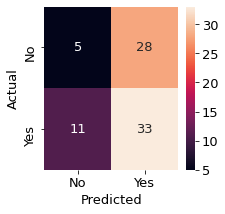

0.6078187389177379
0.902941176470588
0.566989247311828
0.5956636500754147

---------------
Means Cross Validation Accuracy Score :0.755566471426573
Precision : From the Prediction of High, 57.99999999999999% values are predicted correctly
Recall : From overall High, 87.0% values are predicted correctly
AUC : 56.99999999999999%
---------------
------
True Nagatives: 5
Specificity: 0.15151515151515152
              precision    recall  f1-score   support

         Low       0.31      0.15      0.20        33
        High       0.54      0.75      0.63        44

    accuracy                           0.49        77
   macro avg       0.43      0.45      0.42        77
weighted avg       0.44      0.49      0.45        77

roc_auc: 0.45075757575757575
RandomForestClassifier(max_depth=11.0, max_features=230, min_samples_leaf=0.1,
                       min_samples_split=0.30000000000000004, n_estimators=1)
---------------


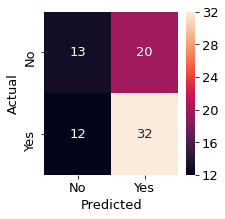

0.6155604698019559
0.6450980392156862
0.4920430107526882
0.47755153343388645

---------------
Means Cross Validation Accuracy Score :0.7435667166316308
Precision : From the Prediction of High, 53.0% values are predicted correctly
Recall : From overall High, 67.0% values are predicted correctly
AUC : 49.0%
---------------
------
True Nagatives: 13
Specificity: 0.3939393939393939
              precision    recall  f1-score   support

         Low       0.52      0.39      0.45        33
        High       0.62      0.73      0.67        44

    accuracy                           0.58        77
   macro avg       0.57      0.56      0.56        77
weighted avg       0.57      0.58      0.57        77

roc_auc: 0.5606060606060606


In [110]:
clsfrs = [auc_clf_rf,spec_clf_rf]
for clf in clsfrs:
    opti_clf_rf =clf
    opti_clf_rf.fit(X_train, y_train)
    score = opti_clf_rf.score(X_test, y_test)
    
    ## Validation
    y_pred = opti_clf_rf.predict(X_test)
    
    #print(y_pred)
    y_train_pred=opti_clf_rf.predict(X_train)    
   
    
    ## Confusion Matrix 
    print(clf)
    print('---------------')
    
    fig, ax = plt.subplots(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    ## K Fold Validation with 10 Folds
    scores = cross_val_score(opti_clf_rf, dataset,labels_clsfier, cv=10, scoring="accuracy")
    scores=np.sqrt(scores)
    print(np.mean((cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="precision"))))
    print((np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="recall"))))
    print(np.mean(cross_val_score(opti_clf_rf, dataset,labels_clsfier, cv=10, scoring="accuracy")))
   
    print(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="roc_auc")))
    print()
    
    print('---------------')
    print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
    print('Precision : From the Prediction of High, '+str(round(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="precision")),2)*100)+'% values are predicted correctly')
    print('Recall : From overall High, '+str(round(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="recall")),2)*100)+'% values are predicted correctly')
    print('AUC : '+str(round(np.mean(cross_val_score(opti_clf_rf, dataset, labels_clsfier, cv=10, scoring="roc_auc")),2)*100)+'%')
    print('---------------')
    
    
    print('------')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Nagatives:",tn)
    print("Specificity:",tn / (tn + fp))
    print(classification_report(y_test, y_pred, target_names=['Low','High']))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test[:77].array, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("roc_auc:",roc_auc)

In [111]:
names = [
         "Random Forest-AUC", "Random Forest-specificity"]
clsfrs = [auc_clf_rf,spec_clf_rf]
imps =[]
for name, clf in zip(names, clsfrs):
    importances = clf.feature_importances_
    std = np.std([
        tree.feature_importances_ for tree in clf.estimators_], axis=0)


    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(dataset.columns, clf.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    importances = importances.sort_values(by='Gini-importance',ascending=False)
    importances.to_csv('rf_exp_T0/'+name+'.csv')
    imps.append(importances)

In [112]:
for importances in imps:
    print(importances.head(100))

     Gini-importance
⬇              0.125
CRM            0.125
🍾              0.125
🐻              0.125
🐖              0.125
..               ...
🎽              0.000
🕶              0.000
💈              0.000
🟡              0.000
♊              0.000

[100 rows x 1 columns]
                Gini-importance
📉                      0.524983
♾                      0.475017
title_polarity         0.000000
⏭                      0.000000
🎦                      0.000000
...                         ...
🩺                      0.000000
🖊                      0.000000
🥿                      0.000000
📑                      0.000000
📩                      0.000000

[100 rows x 1 columns]


In [113]:
imps_nonzero =[]
for importances in imps:
    importances_imp =  importances[importances['Gini-importance'] > 0] 
    importances_imp.sort_values(by=['Gini-importance'],ascending=False)
    imps_nonzero.append(importances_imp)
    print(importances_imp)
    

     Gini-importance
⬇              0.125
CRM            0.125
🍾              0.125
🐻              0.125
🐖              0.125
🅿              0.125
🩸              0.125
📷              0.125
   Gini-importance
📉         0.524983
♾         0.475017


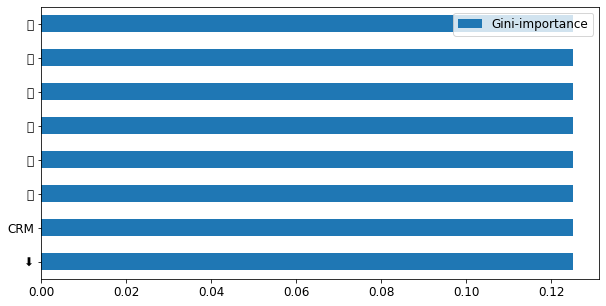

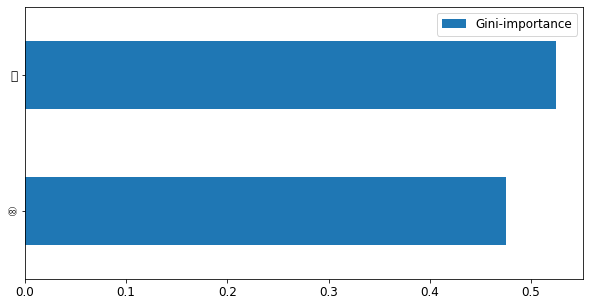

In [114]:
plt.rcParams.update({"font.size": 12, "figure.figsize": [10,5]})
names = [
         "Random Forest-AUC-gini", "Random Forest-specificity-gini"]
for name,imp in zip(names,imps_nonzero):
    imp.sort_values(by='Gini-importance').plot(kind='barh')
    plt.savefig("rf_exp_T0/"+name+".png")

In [115]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels_reg_norm, test_size=0.25, random_state = 4)


n_estimator_RMSE: 8
n_estimator_MAE: 64


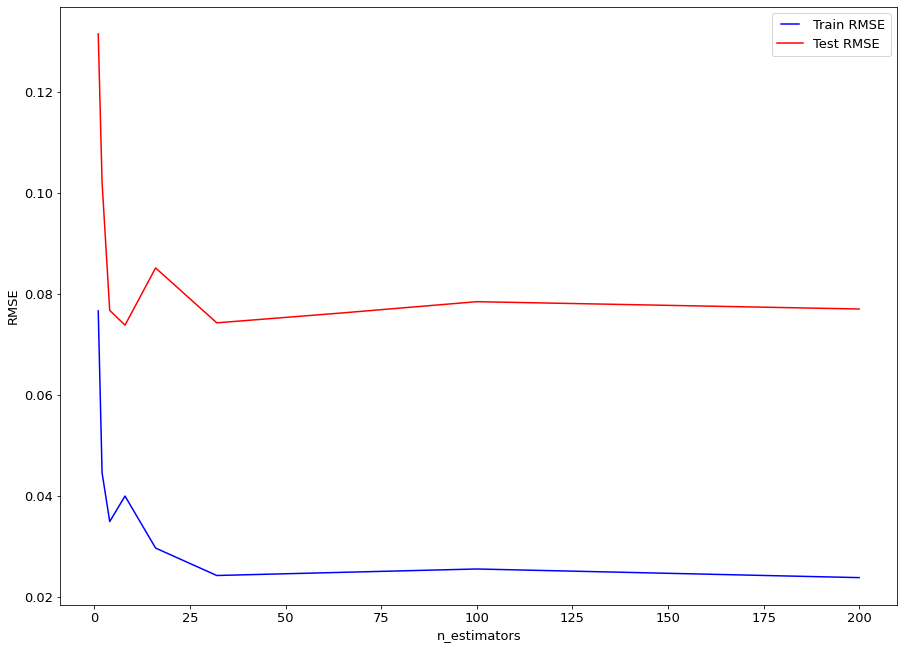

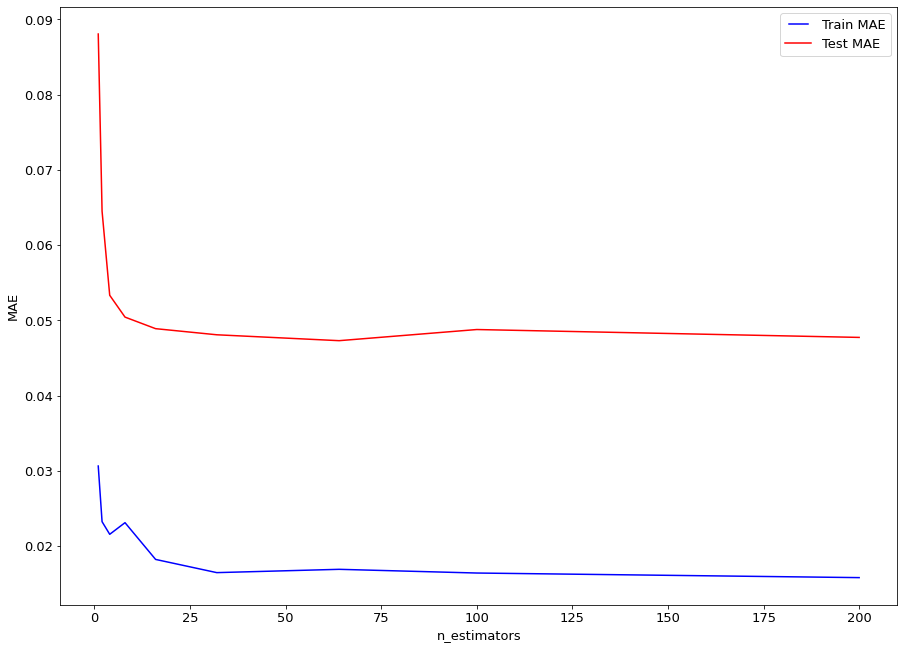

<Figure size 1080x792 with 0 Axes>

In [116]:
# parameter selection for regression
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))
    
print('n_estimator_RMSE:',n_estimators[test_RMSE.index(min(test_RMSE))])
best_n_estimators_RMSE= n_estimators[test_RMSE.index(min(test_RMSE))]

print('n_estimator_MAE:',n_estimators[test_MAE.index(min(test_MAE))])
best_n_estimators_MAE= n_estimators[test_MAE.index(min(test_MAE))]


plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('n_estimators')
plt.show()
plt.savefig("rf_exp_T0/n_estimators_RMSE.png")

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(n_estimators, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('n_estimators')
plt.show()
plt.savefig("rf_exp_T0/n_estimators_MAE.png")

max_depth_RMSE: 20.0
max_depth_MAE: 20.0


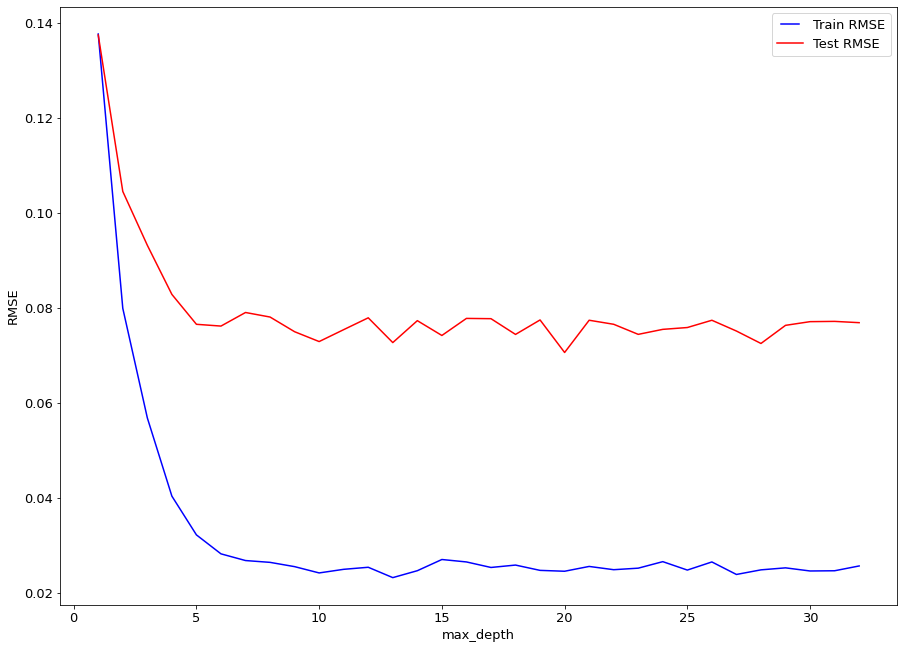

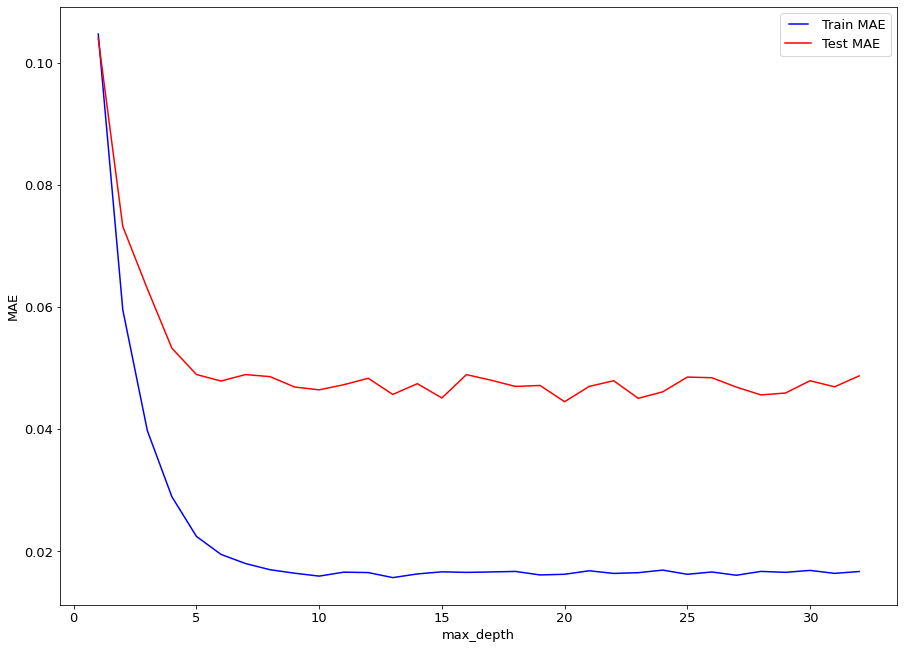

<Figure size 1080x792 with 0 Axes>

In [117]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for max_depth in max_depths:
   rf = RandomForestRegressor(max_depth=max_depth, n_jobs=-1) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))
    
print('max_depth_RMSE:',max_depths[test_RMSE.index(min(test_RMSE))])
best_max_depth_RMSE= max_depths[test_RMSE.index(min(test_RMSE))]

print('max_depth_MAE:',max_depths[test_MAE.index(min(test_MAE))])
best_max_depth_MAE= max_depths[test_MAE.index(min(test_MAE))]

plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_depth')
plt.show()
plt.savefig("rf_exp_T0/max_depth_RMSE.png")

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(max_depths, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('max_depth')
plt.show()
plt.savefig("rf_exp_T0/max_depth_MAE.png")

min_samples_split_RMSE: 0.1
min_samples_split_MAE: 0.1


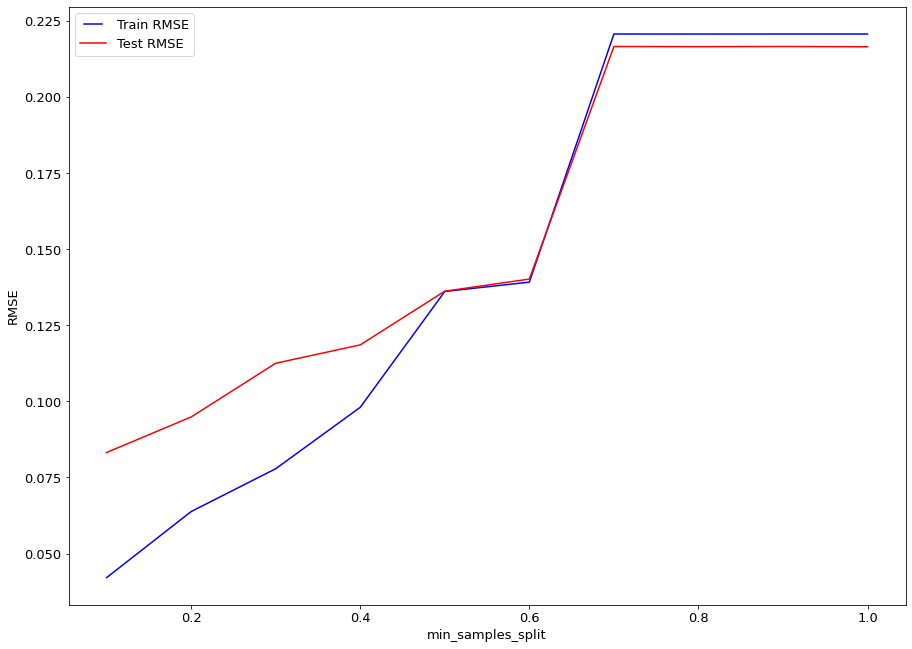

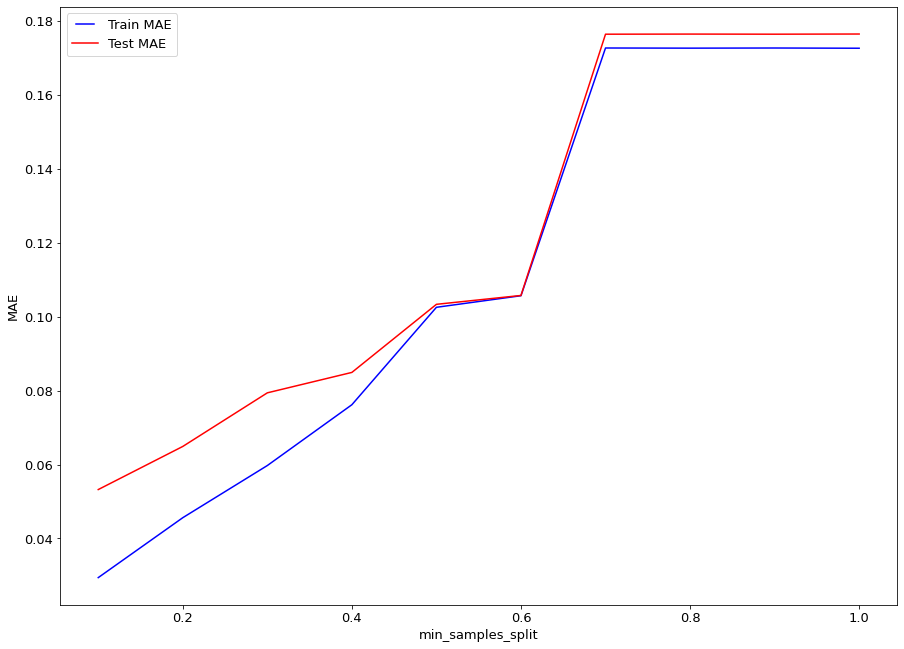

<Figure size 1080x792 with 0 Axes>

In [118]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for min_samples_split in min_samples_splits:
   rf = RandomForestRegressor(min_samples_split=min_samples_split) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))
    
    
print('min_samples_split_RMSE:',min_samples_splits[test_RMSE.index(min(test_RMSE))])
best_min_samples_split_RMSE= min_samples_splits[test_RMSE.index(min(test_RMSE))]

print('min_samples_split_MAE:',min_samples_splits[test_MAE.index(min(test_MAE))])
best_min_samples_split_MAE= min_samples_splits[test_MAE.index(min(test_MAE))]

plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_splits, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_split')
plt.show()
plt.savefig("rf_exp_T0/min_samples_split_RMSE.png")

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(min_samples_splits, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('min_samples_split')
plt.show()
plt.savefig("rf_exp_T0/min_samples_split_MAE.png")

min_samples_leaf_RMSE: 0.1
min_samples_leaf_MAE: 0.1


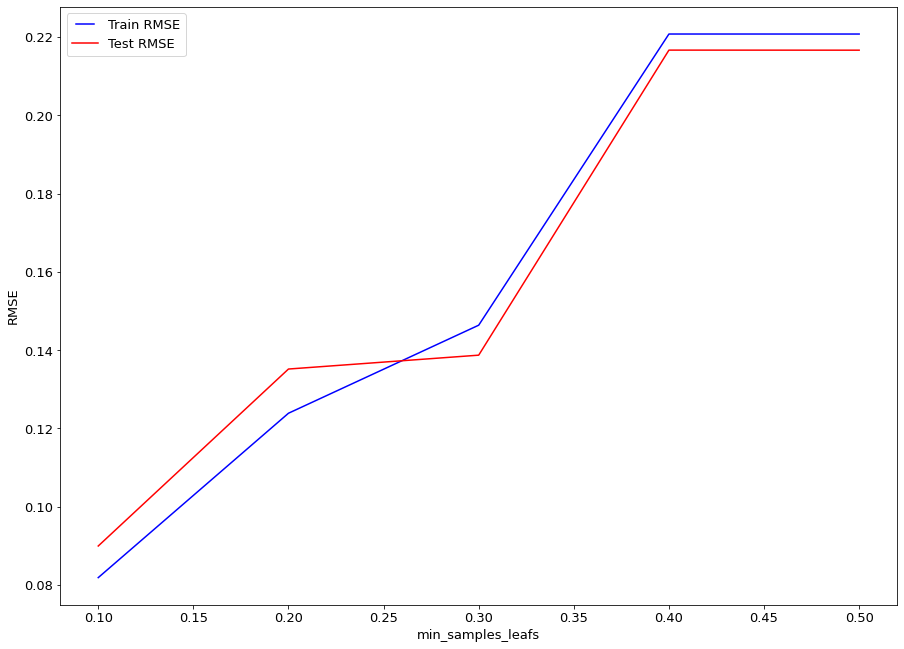

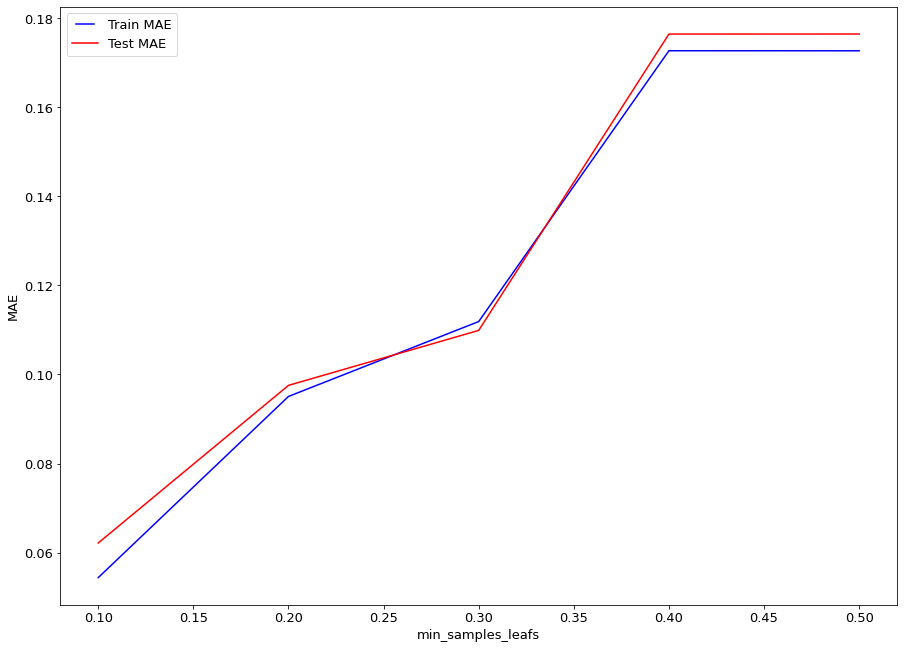

<Figure size 1080x792 with 0 Axes>

In [119]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for min_samples_leaf in min_samples_leafs:
   rf = RandomForestRegressor(min_samples_leaf=min_samples_leaf) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))


print('min_samples_leaf_RMSE:',min_samples_leafs[test_RMSE.index(min(test_RMSE))])
best_min_samples_leaf_RMSE= min_samples_leafs[test_RMSE.index(min(test_RMSE))]

print('min_samples_leaf_MAE:',min_samples_leafs[test_MAE.index(min(test_MAE))])
best_min_samples_leaf_MAE= min_samples_leafs[test_MAE.index(min(test_MAE))]


plt.rcParams.update({"font.size": 13, "figure.figsize": [15,11]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leafs, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('min_samples_leafs')
plt.show()
plt.savefig("rf_exp_T0/min_samples_leaf_RMSE.png")

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(min_samples_leafs, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('min_samples_leafs')
plt.show()
plt.savefig("rf_exp_T0/min_samples_leaf_MAE.png")

Elapsed time to compute the importances: 10500.804 seconds
max_feature_RMSE: 261
max_feature_MAE: 1056


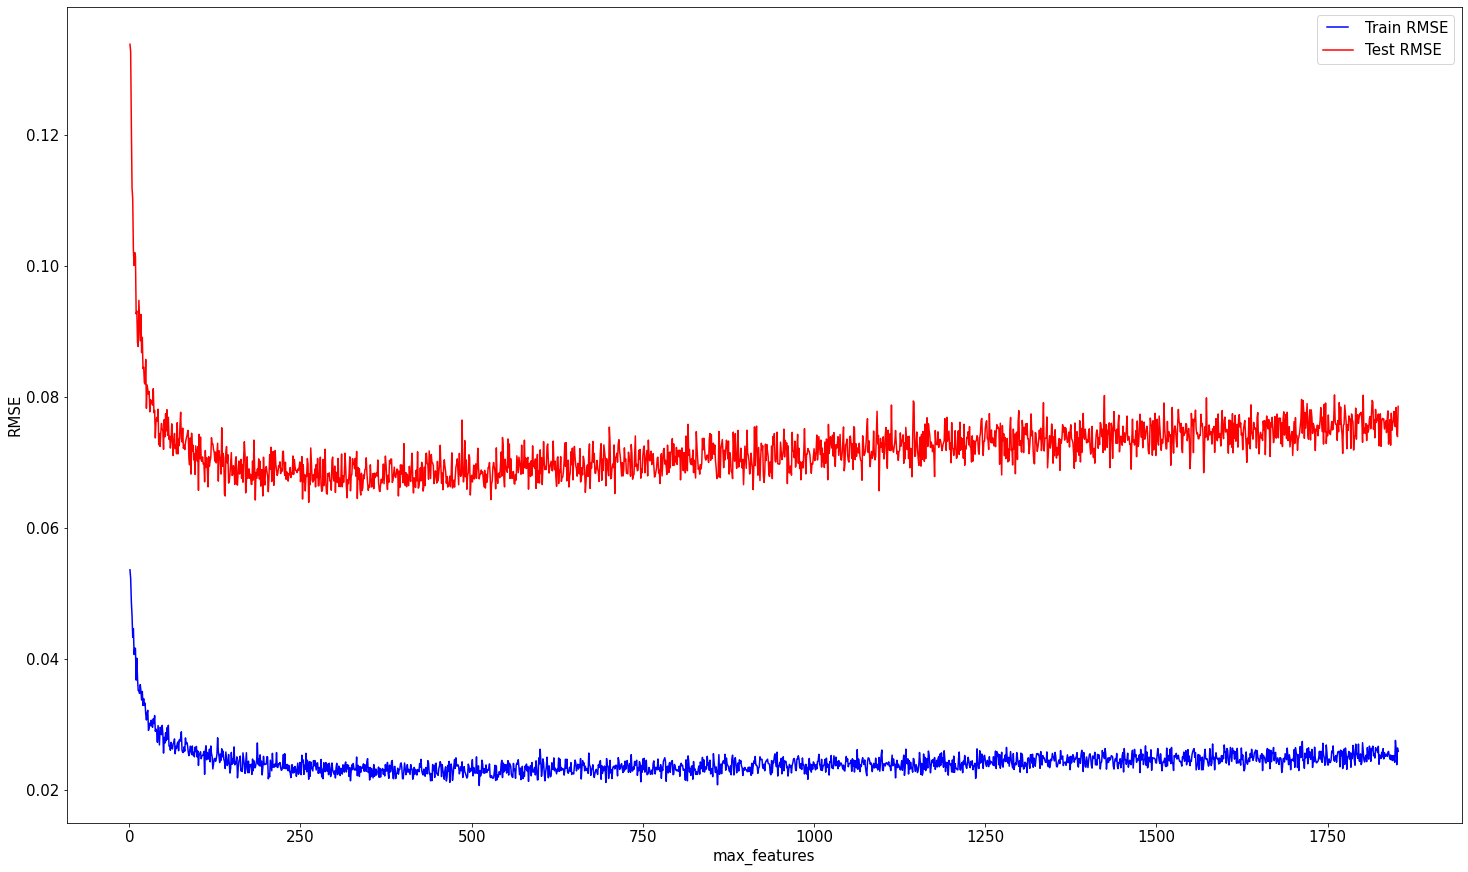

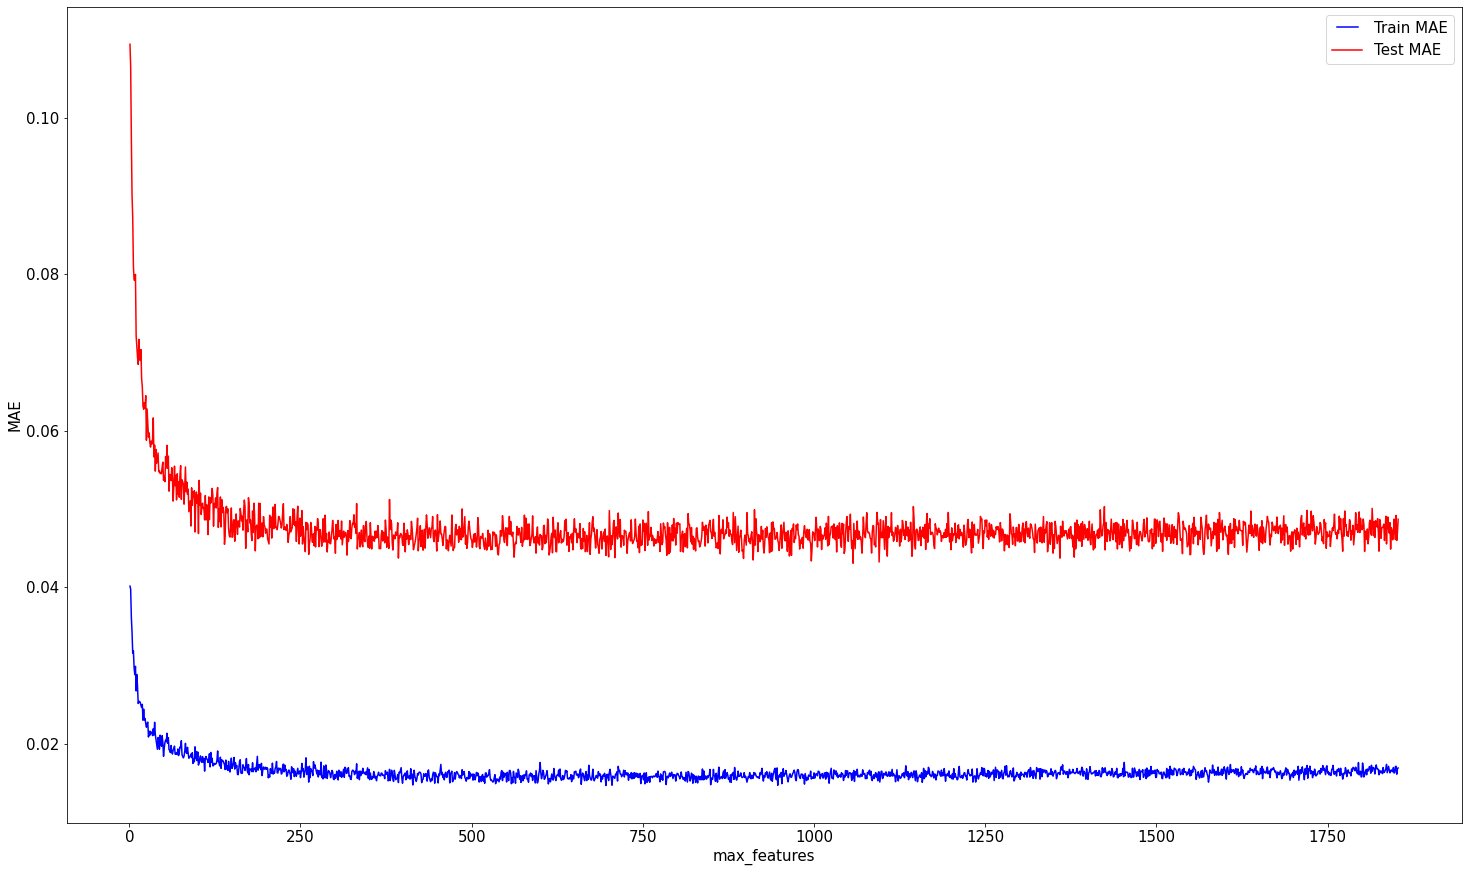

<Figure size 1800x1080 with 0 Axes>

In [120]:
import time
start_time = time.time()
max_features = list(range(1,X_train.shape[1]))
train_RMSE = []
test_RMSE = []

train_MAE = []
test_MAE = []

for max_feature in max_features:
   rf = RandomForestRegressor(max_features=max_feature) 
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   rmse = sqrt(mean_squared_error(y_train, train_pred))   
   train_RMSE.append(rmse)
   train_MAE.append(mean_absolute_error(y_train, train_pred))
   y_pred = rf.predict(X_test)
   rmse = sqrt(mean_squared_error(y_test, y_pred))   
   test_RMSE.append(rmse)
   test_MAE.append(mean_absolute_error(y_test, y_pred))
    
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")


print('max_feature_RMSE:',test_RMSE.index(min(test_RMSE)))
best_max_feature_RMSE= test_RMSE.index(min(test_RMSE))

print('max_feature_MAE:',test_MAE.index(min(test_MAE)))
best_max_feature_MAE= test_MAE.index(min(test_MAE))


plt.rcParams.update({"font.size": 15, "figure.figsize": [25,15]})
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_RMSE, 'b', label='Train RMSE')
line2, = plt.plot(max_features, test_RMSE, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE')
plt.xlabel('max_features')
plt.show()
plt.savefig("rf_exp_T0/max_feature_RMSE.png")

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_MAE, 'b', label='Train MAE')
line2, = plt.plot(max_features, test_MAE, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE')
plt.xlabel('max_features')
plt.show()
plt.savefig("rf_exp_T0/max_feature_MAE.png")

In [121]:
print(min(test_RMSE))
print(test_RMSE.index(min(test_RMSE)))
print(test_RMSE[test_RMSE.index(min(test_RMSE))])

0.06391274317464285
261
0.06391274317464285


In [122]:
print(min(test_MAE))
print(test_MAE.index(min(test_MAE)))
print(test_MAE[test_MAE.index(min(test_MAE))])

0.04304924006057372
1056
0.04304924006057372


In [123]:
from  matplotlib import pyplot
from matplotlib.pyplot import figure
def calculate_errors(predictions,method):
    ## get originl area from the transformed one.
   
    # RootMeanSquared Error Calculation 
    print("\n\nFor "+method)
    meanSquaredError_nb_one = mean_squared_error(y_test, predictions)
  
    rootMeanSquaredError_nb_one = sqrt(meanSquaredError_nb_one)
    print("RMSE:", rootMeanSquaredError_nb_one)

    # MeanAbsolute Error Calculation 
    absolute_error_nb_one = mean_absolute_error(y_test, predictions)
    print("Absolute error is:", absolute_error_nb_one)   
   
    
    #print("R2 error is:",r2_score(y_test_orig, predictions_inverse))
    
    #print(predictions)
    #print(y_test)
   
    fig = figure(figsize=(19, 13))
    pyplot.plot(predictions, label='Predicated Price (Normalized)')#, fontsize=18)
    pyplot.plot(y_test, label='Actual Price (Normalized)')#, fontsize=18)
    pyplot.xlabel('Date', fontsize=18)
    pyplot.ylabel('Price', fontsize=18)
    pyplot.xticks(fontsize=13, rotation=90)
    pyplot.legend( prop={'size':16})
    pyplot.show()
    fig.savefig('rf_exp_T0/'+method +'.png')


In [127]:


# Importing all the required Regressors used in the paper

RMSE_reg_rf = RandomForestRegressor(max_features=best_max_feature_RMSE,
                               min_samples_leaf=best_min_samples_leaf_RMSE,
                               min_samples_split=best_min_samples_split_RMSE,
                               max_depth=best_max_depth_RMSE,
                               n_estimators=best_n_estimators_RMSE
                              ) # Random Forest Regressor


In [128]:
MAE_reg_rf = RandomForestRegressor(max_features=best_max_feature_MAE,
                               min_samples_leaf=best_min_samples_leaf_MAE,
                               min_samples_split=best_min_samples_split_MAE,
                               max_depth=best_max_depth_MAE,
                               n_estimators=best_n_estimators_MAE
                              ) # Random Forest Regressor



For Random Forest - RMSE
RMSE: 0.08324355729335567
Absolute error is: 0.061366905672626974


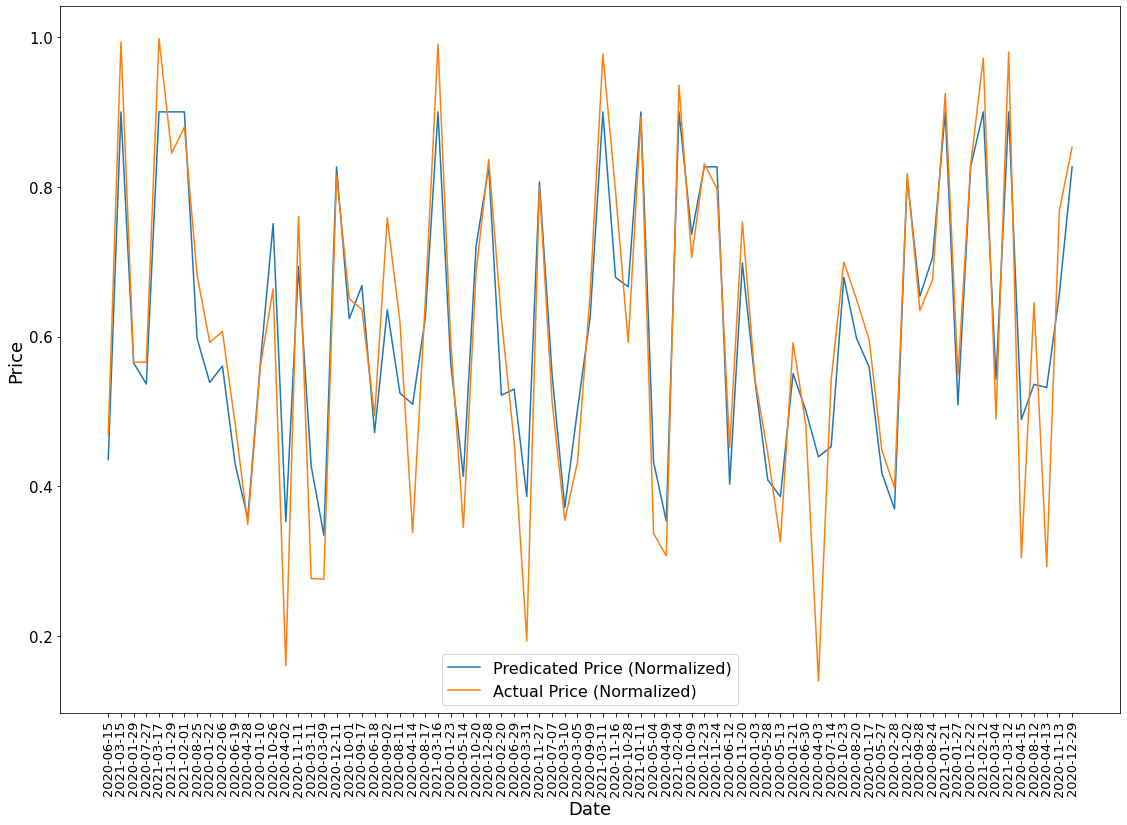



For Random Forest - MAE
RMSE: 0.08382653001611189
Absolute error is: 0.060191492994738374


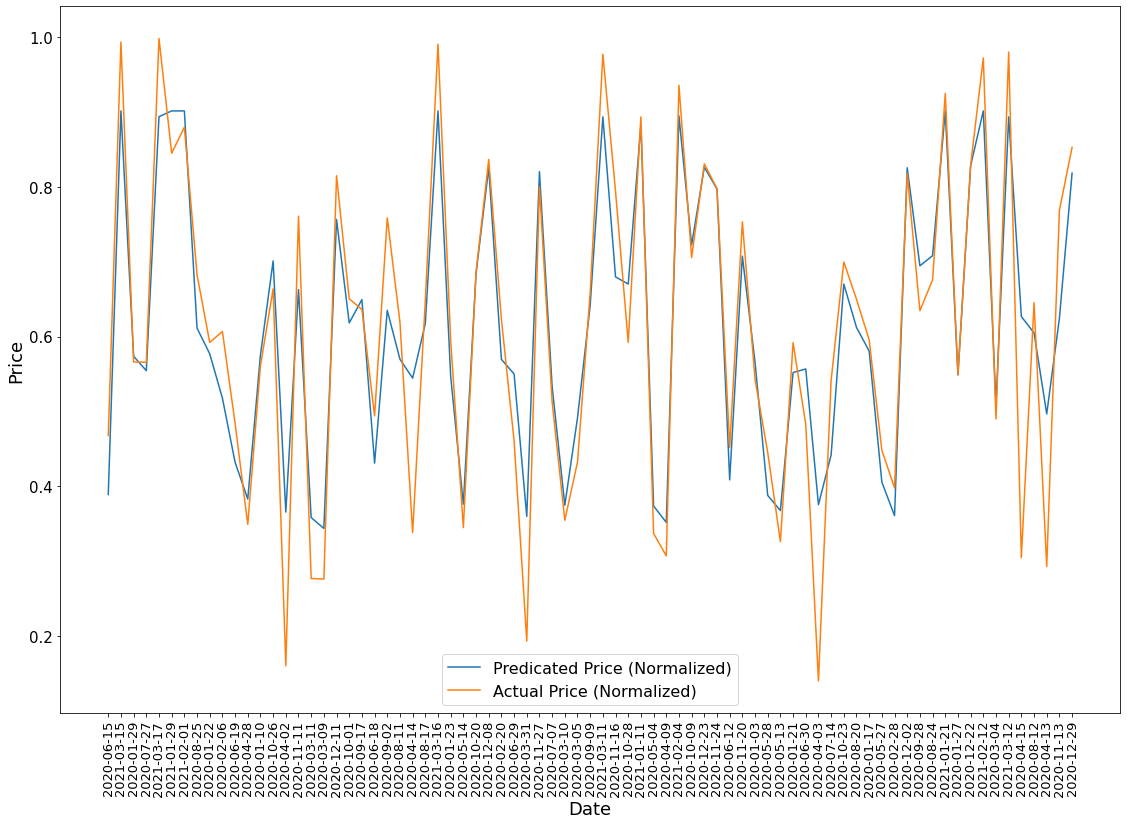

In [129]:

# Random Forest Regressor - RMSE

# Training using Random Forest Regressor
RMSE_reg_rf.fit(X_train, y_train)
# Testing using Random Forest Regressor
predictions_rf_one = RMSE_reg_rf.predict(X_test)

calculate_errors(predictions_rf_one,"Random Forest - RMSE")


# Random Forest Regressor - MAE

MAE_reg_rf.fit(X_train, y_train)
# Testing using Random Forest Regressor
predictions_rf_two = MAE_reg_rf.predict(X_test)

calculate_errors(predictions_rf_two,"Random Forest - MAE")


In [130]:

importances = RMSE_reg_rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in RMSE_reg_rf.estimators_], axis=0)

In [131]:
plt.rcParams.update({"font.size": 13, "figure.figsize": [50,50]})
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(dataset.columns, RMSE_reg_rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.to_csv('rf_exp_T0/rf_reg_RMSE.csv')

In [132]:
std =std.sort()

In [133]:
plt.rcParams.update({"font.size": 20, "figure.figsize": [390,30]})
fig, ax = plt.subplots()
importances.sort_values(by='Gini-importance').plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [134]:
importances_imp =  importances[importances['Gini-importance'] > 0] 

In [135]:
importances_imp.sort_values(by=['Gini-importance'],ascending=False)

,Gini-importance
GME,0.371861
🚀,0.181046
Options,0.139272
F,0.050737
🍏,0.031114
🤚,0.029877
HAS,0.025369
comment_count,0.025295
Fundamentals,0.025092
X,0.022404


In [136]:
importances_imp.sort_values(by=['Gini-importance'],ascending=False).head(70)

,Gini-importance
GME,0.371861
🚀,0.181046
Options,0.139272
F,0.050737
🍏,0.031114
🤚,0.029877
HAS,0.025369
comment_count,0.025295
Fundamentals,0.025092
X,0.022404


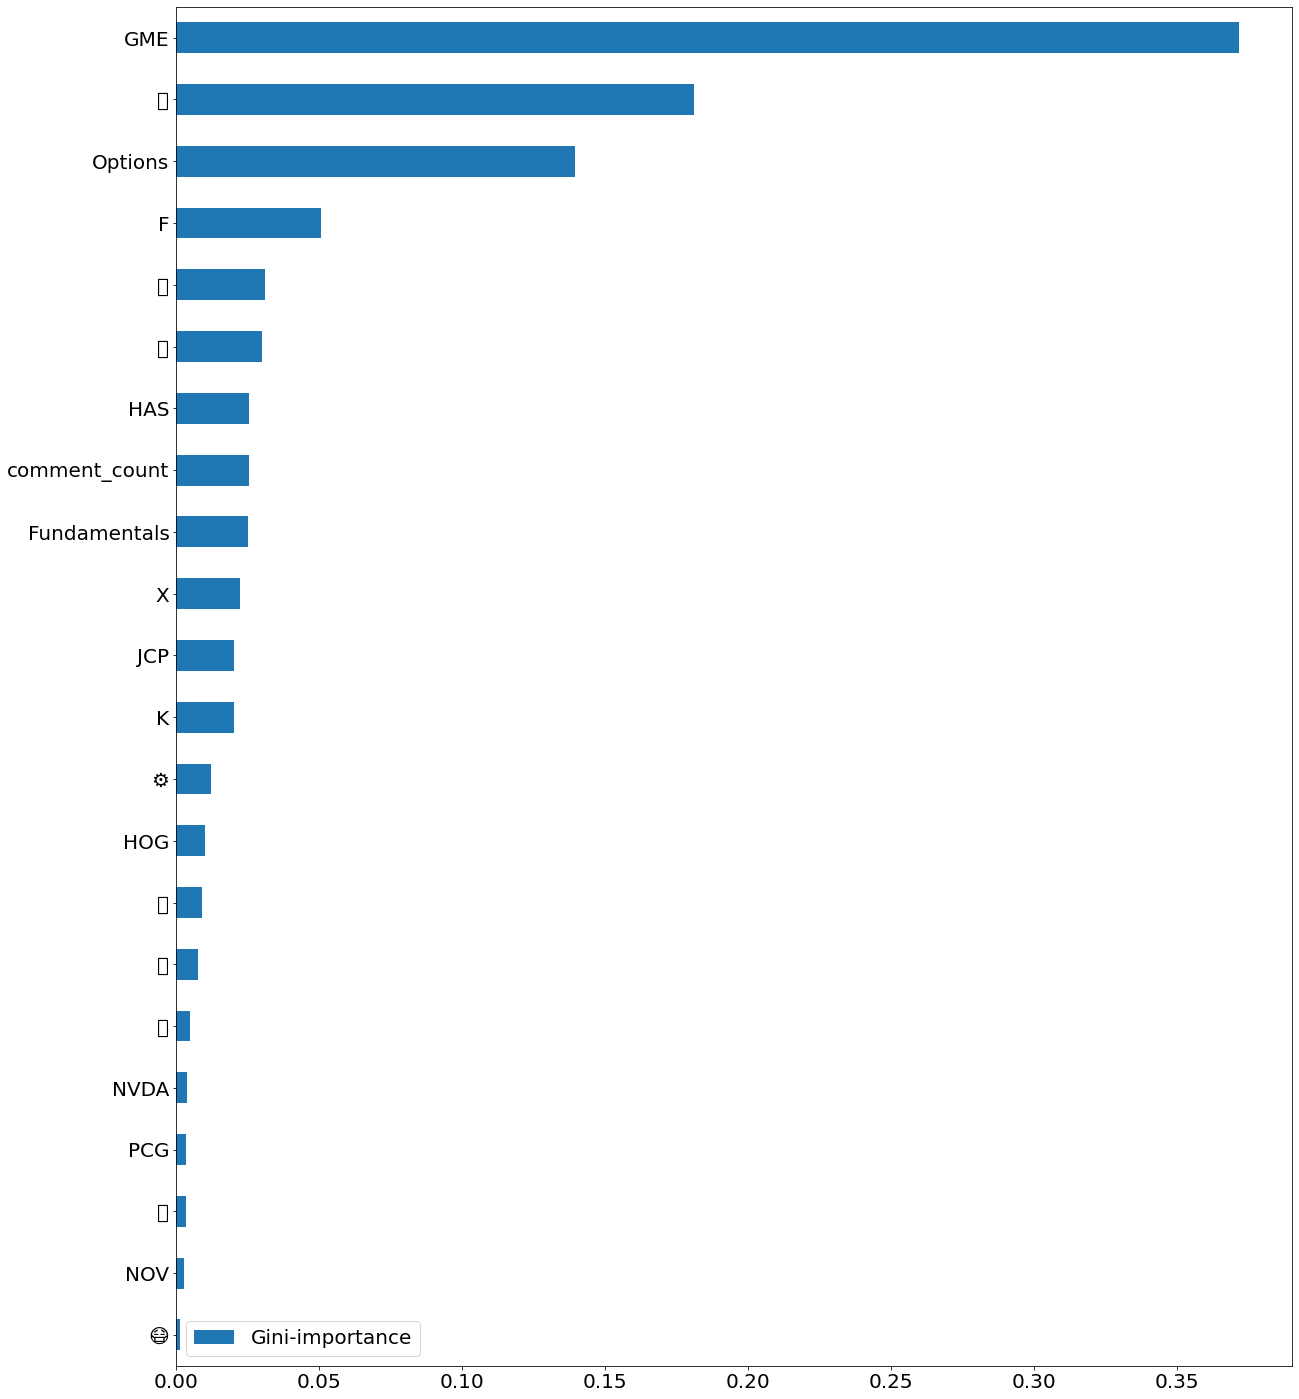

In [137]:
plt.rcParams.update({"font.size": 20, "figure.figsize": [20,25]})
importances_imp.sort_values(by='Gini-importance').plot(kind='barh')
plt.savefig("rf_exp_T0/rf_reg_RMSE_gini.png")

In [138]:
from mlxtend.feature_selection import SequentialFeatureSelector  ## Sequential  Selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt


In [139]:
importances_imp.index.tolist()

['GME',
 '🚀',
 'Options',
 'F',
 '🍏',
 '🤚',
 'HAS',
 'comment_count',
 'Fundamentals',
 'X',
 'JCP',
 'K',
 '⚙',
 'HOG',
 '🤡',
 '🌖',
 '🥭',
 'NVDA',
 'PCG',
 '🌝',
 'NOV',
 '😷']

In [140]:
# choose only top  features from above
dataset_70 = dataset[dataset.columns.intersection(importances_imp.index.tolist())]


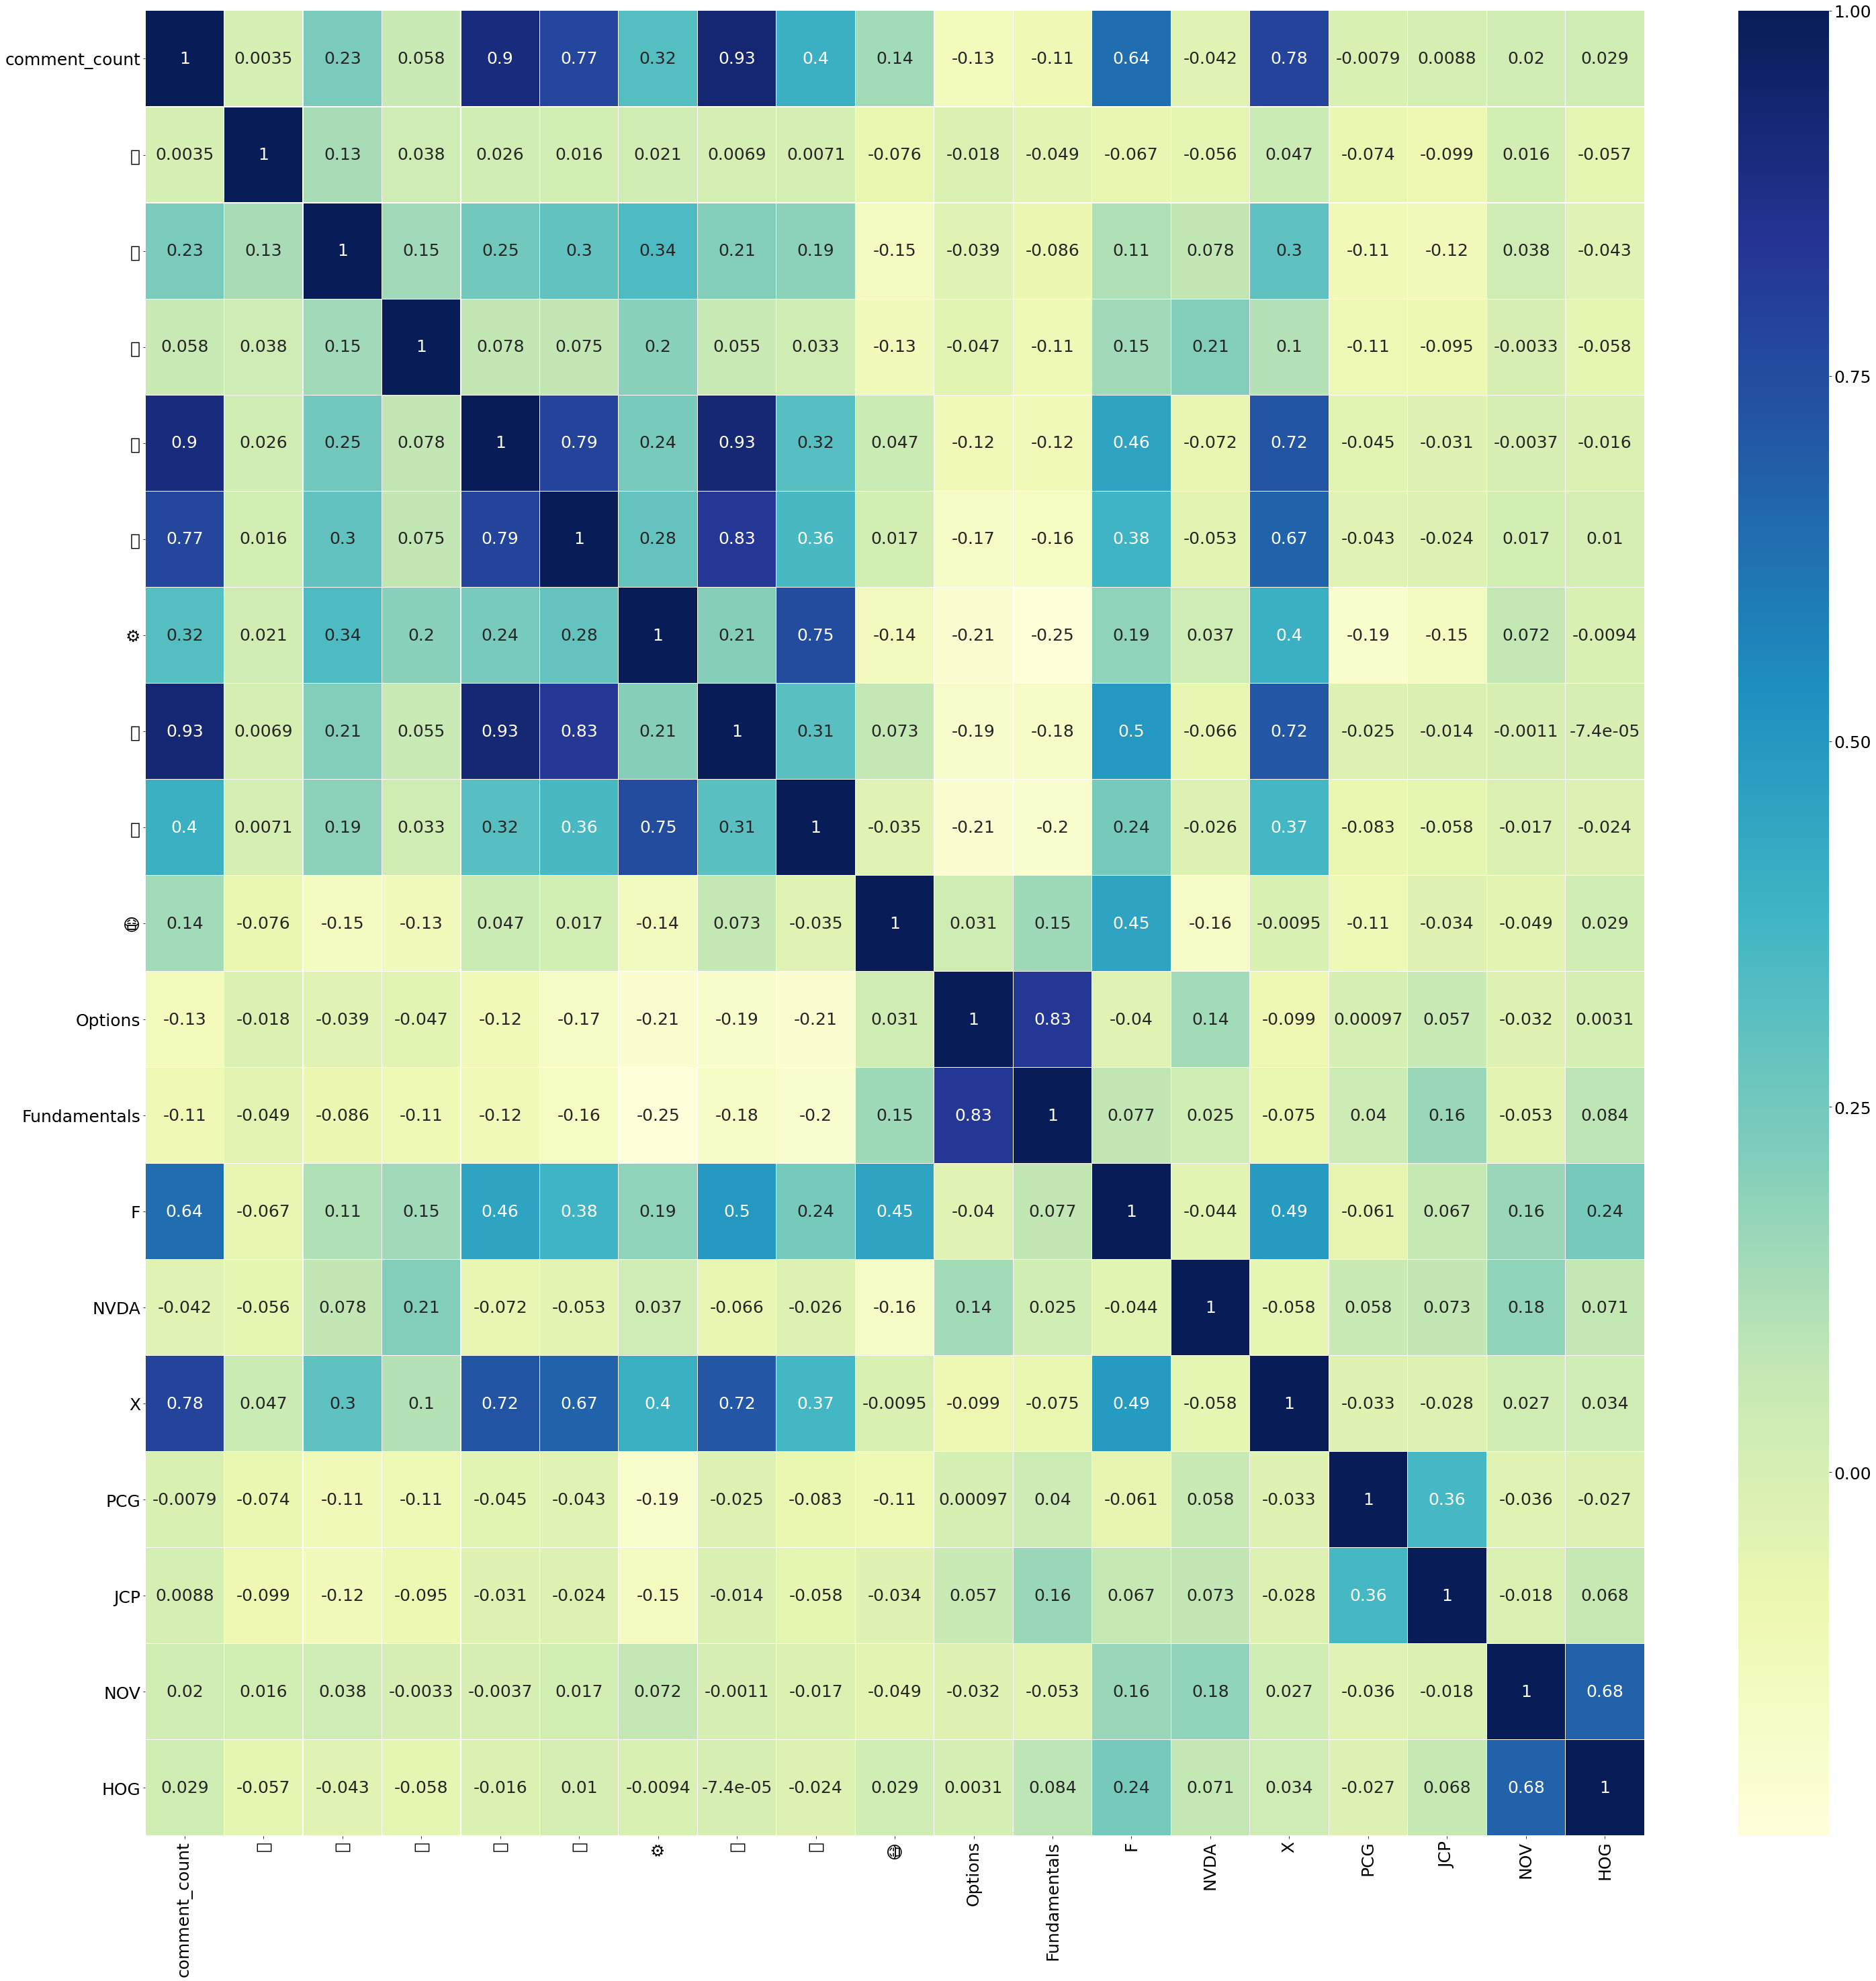

In [198]:
###Remove some of the highly correlated independent variables. (if multicollinearity problem)
plt.rcParams.update({"font.size": 25})
np.set_printoptions(precision=3)
cm = np.corrcoef(dataset_70.values.T) 
f, ax = plt.subplots(figsize =(50, 50)) #figsize =(100, 100)
heatmap = sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1,yticklabels = dataset_70.columns,xticklabels = dataset_70.columns) 
fig = heatmap.get_figure()
fig.savefig("rf_exp_T0/heatmap_normalized.png")

In [142]:
# remove corelated features
colinear_features = ['GME','K','HAS']
features_without_colinearity= importances_imp.index.tolist()
for ele in colinear_features:
    features_without_colinearity.remove(ele)

dataset_70 = dataset[dataset.columns.intersection(features_without_colinearity)]

In [143]:
features_without_colinearity

['🚀',
 'Options',
 'F',
 '🍏',
 '🤚',
 'comment_count',
 'Fundamentals',
 'X',
 'JCP',
 '⚙',
 'HOG',
 '🤡',
 '🌖',
 '🥭',
 'NVDA',
 'PCG',
 '🌝',
 'NOV',
 '😷']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(dataset_70, labels_reg_norm, test_size=0.25, random_state = 4)


In [145]:
dataset_70.columns

Index(['comment_count', '🥭', '🤡', '🍏', '🚀', '🌝', '⚙', '🤚', '🌖', '😷', 'Options',
       'Fundamentals', 'F', 'NVDA', 'X', 'PCG', 'JCP', 'NOV', 'HOG'],
      dtype='object')

In [199]:
rf= RandomForestRegressor()
sfs_rf = SequentialFeatureSelector(rf, k_features=15, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          #scoring='neg_mean_squared_error',
          cv=10)
sfs_rf.fit(X_train, y_train)


SequentialFeatureSelector(cv=10, estimator=RandomForestRegressor(),
                          k_features=15, scoring='neg_root_mean_squared_error')

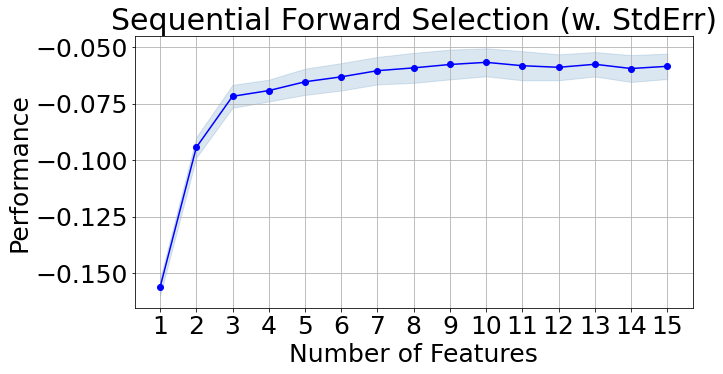

<Figure size 1080x360 with 0 Axes>

In [200]:
fig = plot_sfs(sfs_rf.get_metric_dict(), kind='std_err',figsize=(10,5))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
plt.savefig("rf_exp_T0/sfs_rf_elimination.png")

In [201]:
sfs_rf.k_feature_names_

('comment_count',
 '🥭',
 '🤡',
 '🍏',
 '🚀',
 '⚙',
 '🤚',
 '🌖',
 '😷',
 'Options',
 'Fundamentals',
 'F',
 'X',
 'JCP',
 'HOG')



For SFS_RF
RMSE: 0.06178408983791834
Absolute error is: 0.04242172371680167


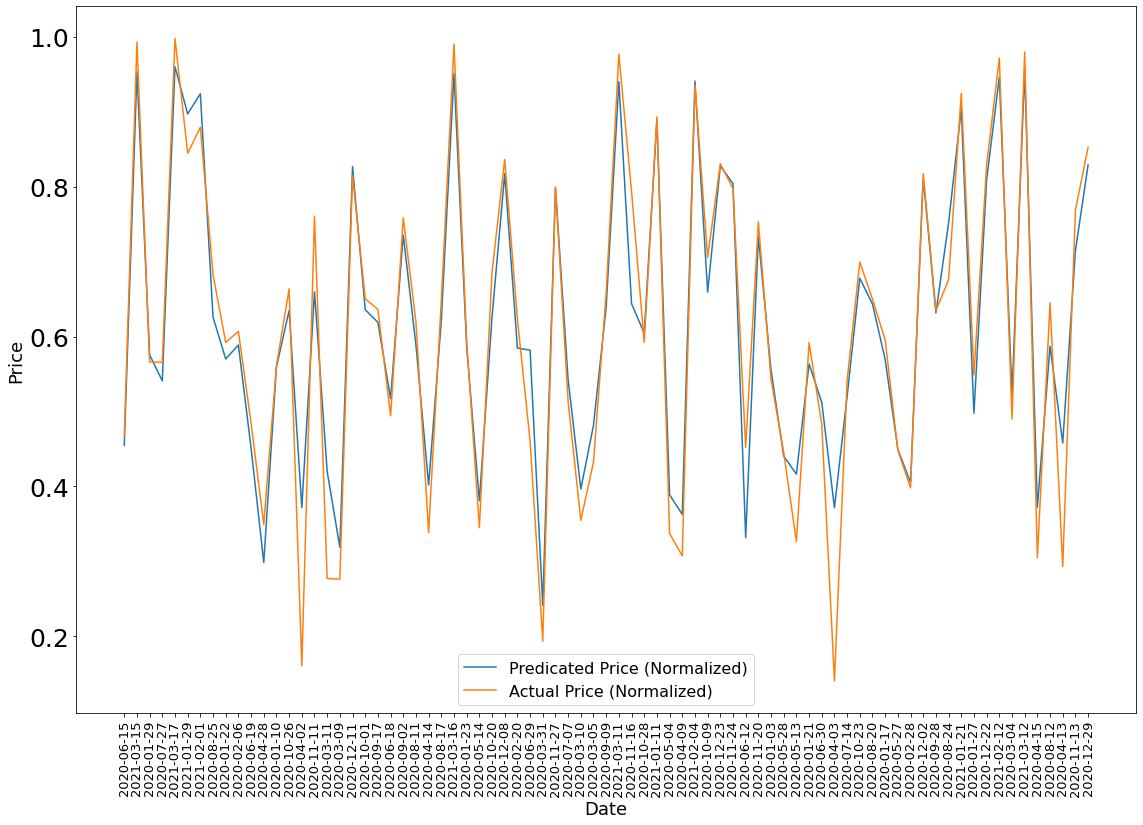

In [202]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, sfs1.k_feature_idx_]

X_train_sfs = sfs_rf.transform(X_train)
X_test_sfs = sfs_rf.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
rf.fit(X_train_sfs, y_train)
y_pred = rf.predict(X_test_sfs)


calculate_errors(y_pred,"SFS_RF")

In [203]:

importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)


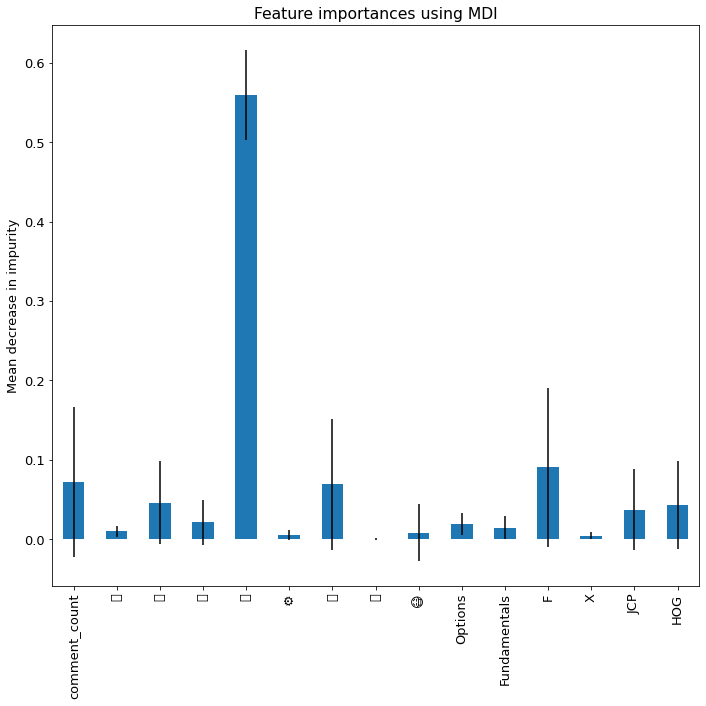

In [204]:
plt.rcParams.update({"font.size": 13, "figure.figsize": [15,5]})
forest_importances = pd.Series(importances, index=sfs_rf.k_feature_names_)

fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax, align='center')
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#ax.invert_yaxis()
fig.tight_layout()

In [205]:
fig.savefig("rf_exp_T0/sfs_rf_MDI.png")